[Link to colab](https://colab.research.google.com/github/lsmin0152/cheb301/blob/main/notebooks/CHEB301_F25_01_plotting.ipynb)

# Python basics - Plotting data

## Install dependencies

We will first have to make sure that the required libraries are installed.

How are python modules installed? Usually, through a package manager like `pip` or `conda`.

How do I find what line to run to install a specific package? You google the package and look at the install section in the documentation.

For example, if we want to install `matplotlib`, we would search for `matplotlib` on google, find https://matplotlib.org/stable/index.html and run the command `pip install matplotlib`.

Because this is a shell command, you have to run it with an `!`.

In [ ]:
!pip install matplotlib

Similar for `seaborn`, you would google the library, find https://seaborn.pydata.org, look at installing, and run `pip install seaborn`.

In [ ]:
!pip install seaborn


## matplotlib and seaborn

`matplotlib` and `seaborn` are both popular plotting libraries in Python.

`matplotlib` is a low-level plotting library that allows you to create a wide variety of plots, including line plots, scatter plots, bar plots, histograms, and more. matplotlib has a lot of customization options, which can make it a bit more difficult to use than other plotting libraries, but it gives you the flexibility to create almost any kind of plot you need.

Here's a simple example of how you could use `matplotlib` to create a line plot:


Text(0.5, 1.0, 'Line Plot')

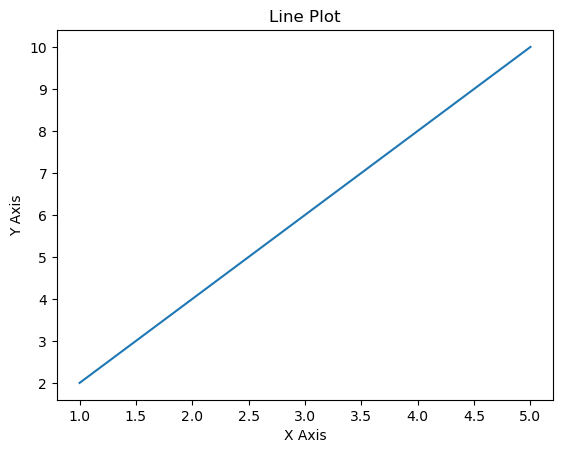

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Line Plot")

Text(0.5, 1.0, 'Scattered Plot')

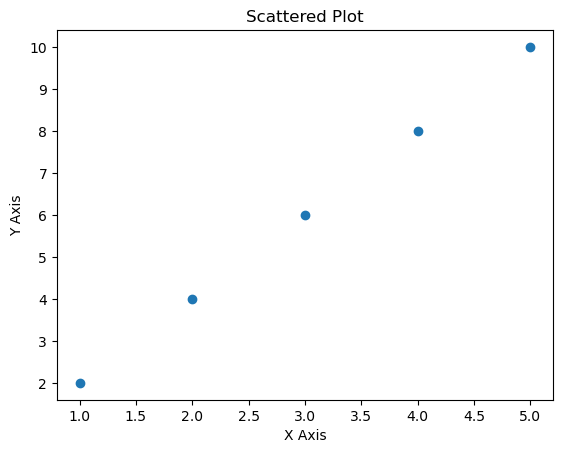

In [2]:

plt.plot(x, y, 'o')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Scattered Plot")


Text(0.5, 1.0, 'Scattered with line Plot')

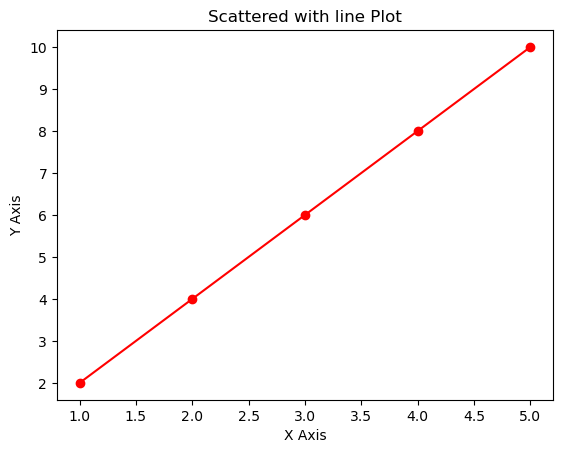

In [4]:
plt.plot(x, y, '-o', color = 'red')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Scattered with line Plot")

`seaborn` is a higher-level plotting library built on top of matplotlib that makes it easier to create beautiful and informative statistical plots. `seaborn` has a lot of built-in functions for plotting commonly used statistical plots, such as violin plots, box plots, and heatmaps, which can save you a lot of time and make your plots look more professional.

Here's a simple example of how you could use `seaborn` to create a scatter plot:


Text(0.5, 1.0, 'Scatter Plot')

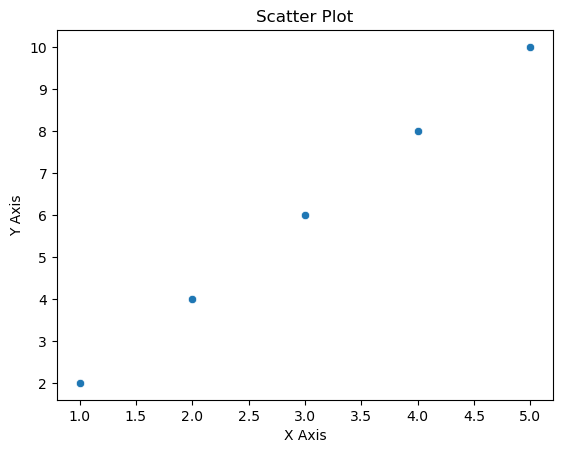

In [5]:
import seaborn as sns

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

sns.scatterplot(x=x, y=y)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Scatter Plot")

Those are just simple plots, but you can check out [`seaborn` gallery](https://seaborn.pydata.org/examples/index.html) for inspiration of more advanced plots.

<Axes: >

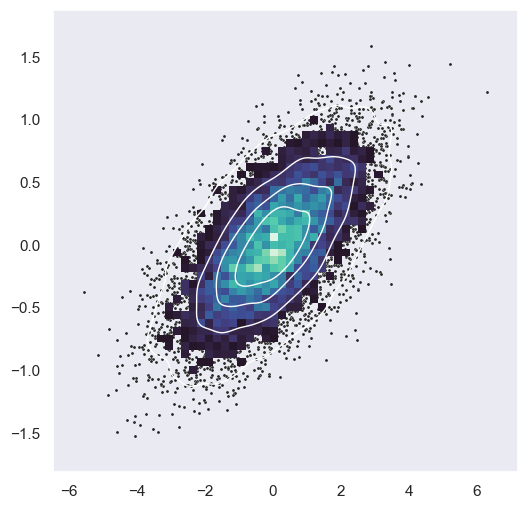

In [7]:
import numpy as np

sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

## Plotting the ESOL data


Let's load the delaney data again. We can also do it directly from the URL.

In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lsmin0152/cheb301/refs/heads/main/notebooks/data/delaney-processed.csv" )

df.describe() # prints summary statistics for each column

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


Pandas directly lets us plot starting from the DataFrame.

<Axes: xlabel='Molecular Weight', ylabel='measured log solubility in mols per litre'>

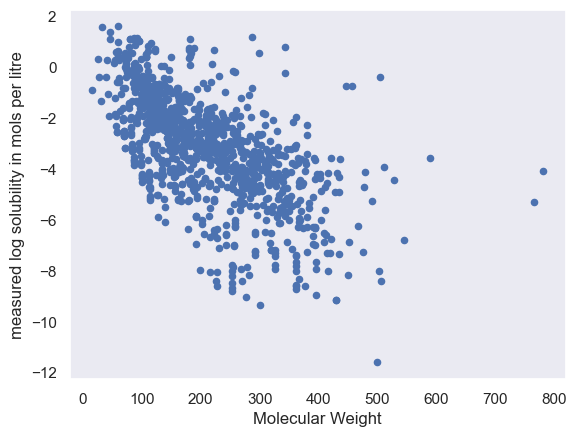

In [10]:
# Plot 'measured log solubility in mols per litre' vs 'Molecular Weight'
df.plot(x='Molecular Weight', y='measured log solubility in mols per litre', kind='scatter')


<Axes: ylabel='Frequency'>

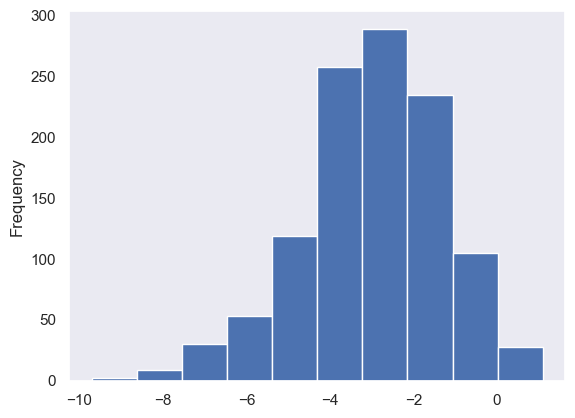

In [11]:
# Plot a histogram of 'ESOL predicted log solubility in mols per litre'
df['ESOL predicted log solubility in mols per litre'].plot(kind='hist')


<Axes: xlabel='Molecular Weight', ylabel='measured log solubility in mols per litre'>

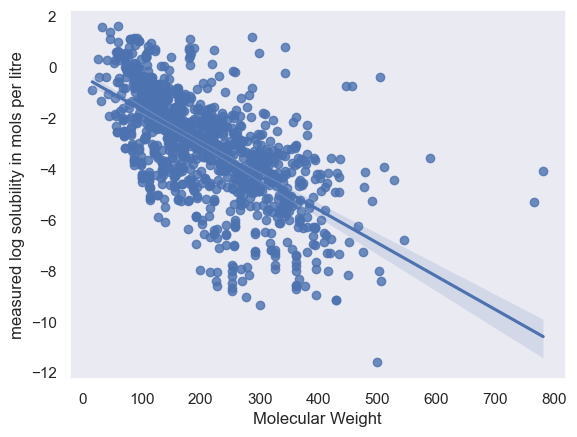

In [12]:
# Scatter plot with regression line
sns.regplot(x='Molecular Weight', y='measured log solubility in mols per litre', data=df)


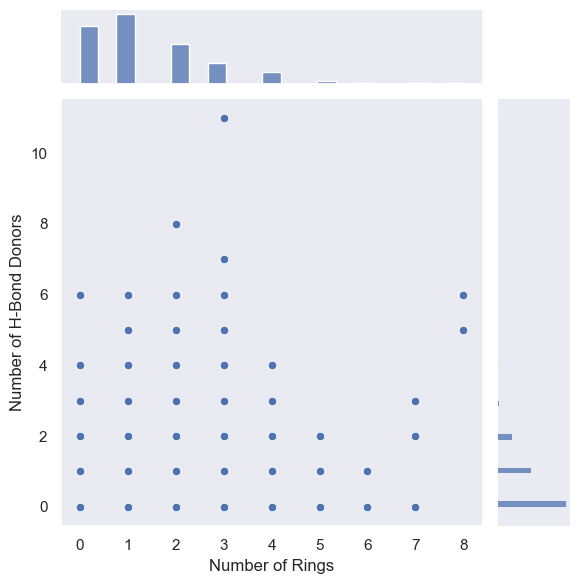

In [13]:
# Joint plot with histograms on the sides
sns.jointplot(x='Number of Rings', y='Number of H-Bond Donors', data=df)


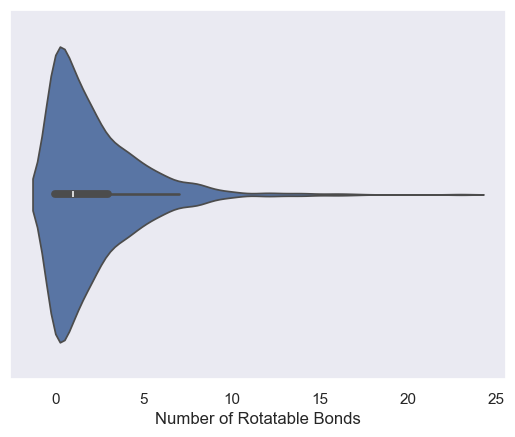

In [15]:
# Violin plot to show the distribution of 'Number of Rotatable Bonds'
sns.violinplot(x='Number of Rotatable Bonds', data=df)
plt.show()
